## Time-Series Forecasting - Predicting Avocado Prices

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### Importing Dataset

In [3]:
avocado = pd.read_csv('avocado.csv')
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
avocado.sort_values('Date', inplace=True)
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
11829,51,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS
11777,51,2015-01-04,1.70,1885.48,748.62,30.19,0.00,1106.67,1106.67,0.00,0.00,organic,2015,Tampa
675,51,2015-01-04,0.99,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver
1247,51,2015-01-04,0.92,101162.98,1991.63,75090.16,283.88,23797.31,7769.36,16027.95,0.00,conventional,2015,Louisville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,0,2018-03-25,1.21,330371.24,87782.44,137599.47,131.89,104857.44,95210.59,7089.08,2557.77,conventional,2018,HarrisburgScranton
17997,0,2018-03-25,1.52,15372.80,2399.71,3164.80,0.00,9808.29,9789.70,18.59,0.00,organic,2018,PhoenixTucson
17733,0,2018-03-25,1.46,31489.27,5372.35,1047.92,0.00,25069.00,23054.17,2014.83,0.00,organic,2018,DallasFtWorth
8706,0,2018-03-25,1.05,228837.36,53795.52,53103.06,7008.97,114929.81,96343.12,15834.92,2751.77,conventional,2018,Indianapolis


#### Explorating Data 

<Axes: xlabel='Date', ylabel='AveragePrice'>

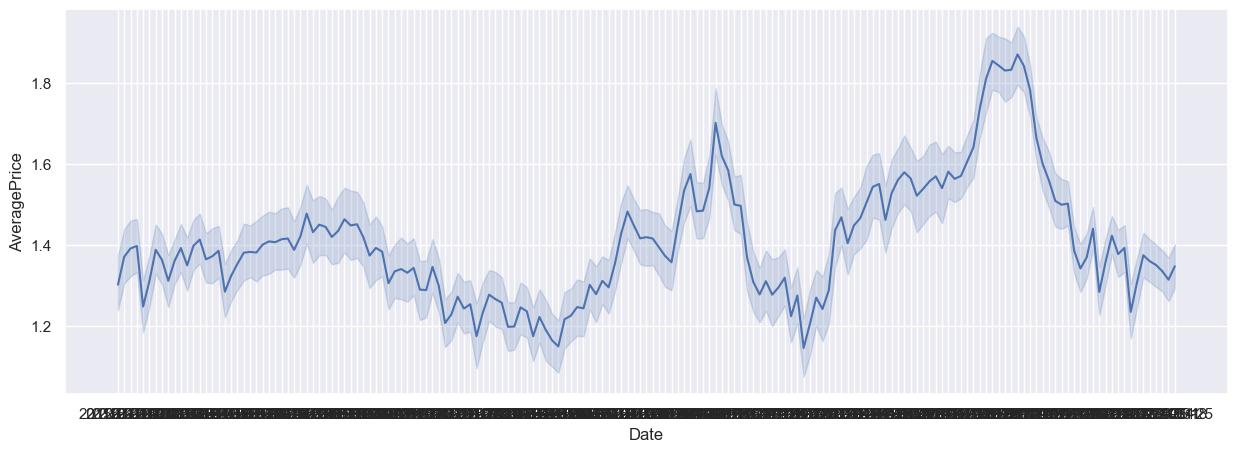

In [10]:
# visualizing AveragePrice Vs Date
plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='AveragePrice', data=avocado)

#### Pre-processing Data

In [12]:
avocado_ts = avocado[['Date', 'AveragePrice']]
avocado_ts

,Date,AveragePrice
11569,2015-01-04,1.75
11829,2015-01-04,1.46
11777,2015-01-04,1.70
675,2015-01-04,0.99
1247,2015-01-04,0.92
...,...,...
8670,2018-03-25,1.21
17997,2018-03-25,1.52
17733,2018-03-25,1.46
8706,2018-03-25,1.05


In [14]:
avocado_ts.columns = ['ds', 'y']
avocado_ts

,ds,y
11569,2015-01-04,1.75
11829,2015-01-04,1.46
11777,2015-01-04,1.70
675,2015-01-04,0.99
1247,2015-01-04,0.92
...,...,...
8670,2018-03-25,1.21
17997,2018-03-25,1.52
17733,2018-03-25,1.46
8706,2018-03-25,1.05


#### Model Training and Building 

In [15]:
from prophet import Prophet

m = Prophet()
m.fit(avocado_ts)

c:\Users\Amr Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
01:28:19 - cmdstanpy - INFO - Chain [1] start processing
01:28:25 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = m.make_future_dataframe(periods=365)
future

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01
...,...
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24


In [18]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.502491,0.892671,1.879892,1.502491,1.502491,-0.118084,-0.118084,-0.118084,-0.118084,-0.118084,-0.118084,0.0,0.0,0.0,1.384407
1,2015-01-11,1.497044,0.923682,1.898029,1.497044,1.497044,-0.109746,-0.109746,-0.109746,-0.109746,-0.109746,-0.109746,0.0,0.0,0.0,1.387298
2,2015-01-18,1.491597,0.877864,1.862084,1.491597,1.491597,-0.109318,-0.109318,-0.109318,-0.109318,-0.109318,-0.109318,0.0,0.0,0.0,1.382279
3,2015-01-25,1.486151,0.865703,1.828522,1.486151,1.486151,-0.127957,-0.127957,-0.127957,-0.127957,-0.127957,-0.127957,0.0,0.0,0.0,1.358193
4,2015-02-01,1.480704,0.829603,1.828484,1.480704,1.480704,-0.155828,-0.155828,-0.155828,-0.155828,-0.155828,-0.155828,0.0,0.0,0.0,1.324876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.160566,0.523229,1.625477,0.948662,1.362313,-0.086288,-0.086288,-0.086288,-0.086288,-0.086288,-0.086288,0.0,0.0,0.0,1.074279
530,2019-03-22,1.159827,0.550904,1.612585,0.946961,1.361970,-0.084506,-0.084506,-0.084506,-0.084506,-0.084506,-0.084506,0.0,0.0,0.0,1.075322
531,2019-03-23,1.159088,0.549515,1.641787,0.945511,1.362615,-0.082447,-0.082447,-0.082447,-0.082447,-0.082447,-0.082447,0.0,0.0,0.0,1.076641
532,2019-03-24,1.158349,0.540597,1.587458,0.944463,1.362731,-0.080132,-0.080132,-0.080132,-0.080132,-0.080132,-0.080132,0.0,0.0,0.0,1.078217


c:\Users\Amr Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Amr Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


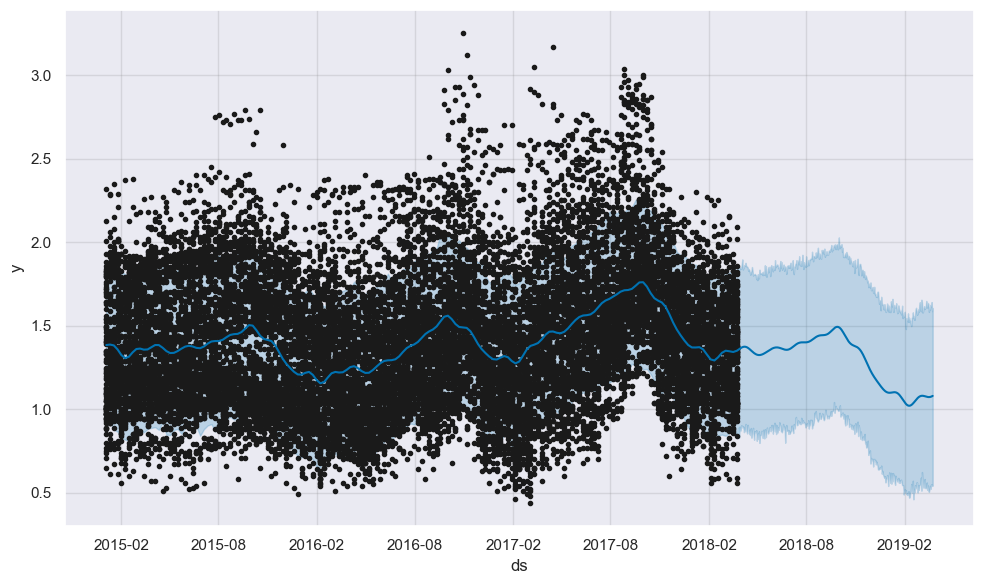

In [19]:
fig1 = m.plot(forecast)

c:\Users\Amr Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Amr Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\Amr Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a

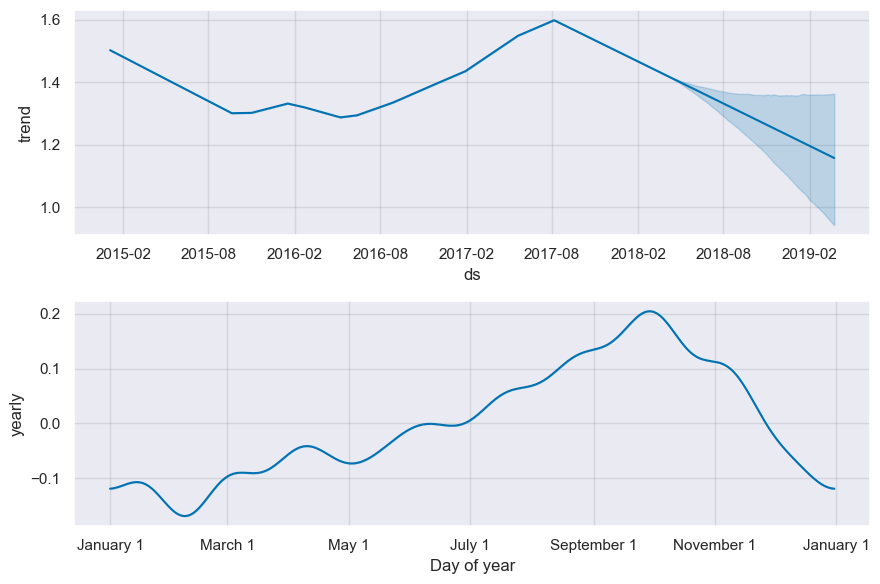

In [20]:
fig2 = m.plot_components(forecast)